In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [453]:
hdata1=pd.read_excel('health.xlsx', sheet_name='2016-17')
hdata2=pd.read_excel('health.xlsx', sheet_name='2017-18')
hdata3=pd.read_excel('health.xlsx', sheet_name='2018-19')
hdata4=pd.read_excel('health.xlsx', sheet_name='2019-20')
hdata5=pd.read_excel('health.xlsx', sheet_name='2020-21')

In [454]:
df = pd.concat([hdata1,hdata2,hdata3,hdata4,hdata5],ignore_index=True)

In [455]:
df

,P.No.,Name,Test Date,Year,Cycle,Gender,Age,Height,Weight,Division,...,ECG,ECG Remarks,TMT Status,TMT Date,TMT Remarks,Systematic Examination Remarks,Grade,Area,Phone,Email
0,306708,Shyamjee Prasad,21-Jan-2017,2016,1,Male,44,180.0,83,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,E-4,CX - Chasis Assy,7970480859,NaN
1,306833,Sanjay Kumar,30-Sep-2016,2016,1,Male,43,169.0,72,Vehicle Factory (excluding vehicle dispatch),...,WNL,NaN,Negative,NaN,NaN,NaN,E-6,Chassis Assembly,8092730508,NaN
2,302238,S D Singh,12-Jul-2016,2016,2,Male,63,175.0,85,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,TM-A,Vehicle Factory Maint.,NaN,NaN
3,302474,Shatrughna Singh,14-May-2016,2016,1,Male,64,166.0,64,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,302486,Sheo Kumar Singh,21-Jan-2017,2016,1,Male,64,164.0,84,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,389122,Ajay Kumar,09-Dec-2020,2020,1,Male,40,177.0,75,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,NaN,NaN,NaN,NaN,E-4,CX - Chasis Assy,9279215589,NaN
3977,382936,Shyam Sundra Singh,05-Sep-2020,2020,1,Male,50,177.0,76,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,11-MAR-21,NaN,97,E-2,Prod Ctrl (Truck),9955218232,NaN
3978,381539,Aslam Khan,07-Sep-2020,2020,1,Male,55,167.0,78,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,NaN,NaN,NaN,98.6,E-2,CX - Chasis Assy,7061590924,NaN
3979,390310,Kausik Sen,17-Jul-2020,2020,1,Male,42,169.0,69,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,97. F,E-3,Vehicle Factory Maint.,8797943139,NaN


<AxesSubplot:>

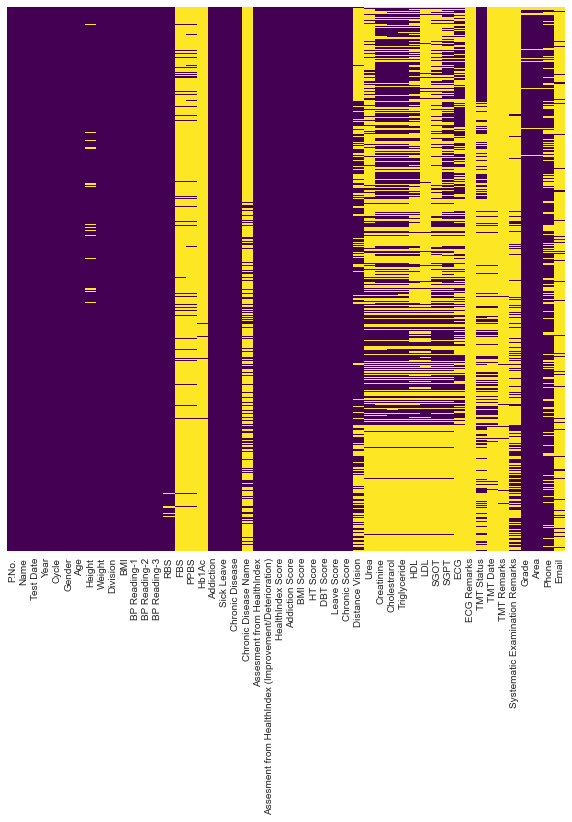

In [456]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [457]:
df.drop(['P.No.','Cycle','Name','Test Date','Year','Systematic Examination Remarks','Grade','Area','Phone','Email','Division','BP Reading-2','BP Reading-3','FBS','PPBS','Hb1Ac','Chronic Disease Name','Distance Vision','LDL','ECG Remarks','TMT Date','TMT Remarks','HealthIndex Score','Assesment from HealthIndex (Improvement/Deterioration)','Addiction Score','BMI Score','HT Score','DBT Score','Leave Score','Chronic Score','ECG','TMT Status','Urea','SGOT','HDL'], axis=1, inplace=True)

<AxesSubplot:>

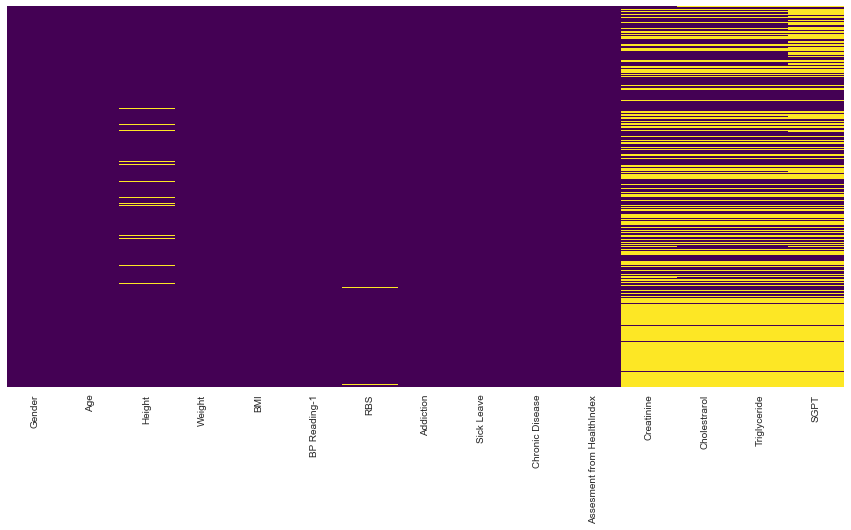

In [458]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [459]:
df.head()

,Gender,Age,Height,Weight,BMI,BP Reading-1,RBS,Addiction,Sick Leave,Chronic Disease,Assesment from HealthIndex,Creatinine,Cholestrarol,Triglyceride,SGPT
0,Male,44,180.0,83,25.06,130/80,84.0,Y,0.0,N,Average Health,1,NaN,NaN,NaN
1,Male,43,169.0,72,25.21,170/110,116.0,N,4.0,N,Best Health,1,218,153,NaN
2,Male,63,175.0,85,27.76,130/80,181.0,Y,9.0,N,Average Health,nil,nil,nil,NaN
3,Male,64,166.0,64,23.23,120/80,94.0,Y,4.0,Y,Average Health,NaN,NaN,NaN,NaN
4,Male,64,164.0,84,31.23,150/90,102.0,Y,1.0,N,Average Health,NaN,NaN,NaN,NaN


In [460]:
df.drop_duplicates(inplace=True)
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(3969, 15)


In [461]:
df.Gender=pd.Categorical(df.Gender,{'Male','Female'},ordered=True)
df.Gender=df.Gender.cat.codes
df.Gender #MALE=0,FEMALE=1

0       0
1       0
2       0
3       0
4       0
       ..
3976    0
3977    0
3978    0
3979    0
3980    0
Name: Gender, Length: 3969, dtype: int8

In [462]:
df.Addiction=pd.Categorical(df.Addiction,{'Y','N'},ordered=True)
df.Addiction=df.Addiction.cat.codes
df.Addiction  #Y=1,N=0

0       1
1       0
2       1
3       1
4       1
       ..
3976    0
3977    0
3978    0
3979    0
3980    0
Name: Addiction, Length: 3969, dtype: int8

In [463]:
df.rename(columns={'Chronic Disease':'Chronic_Disease'},inplace=True)
df.Chronic_Disease=pd.Categorical(df.Chronic_Disease,{'Y','N'},ordered=True)
df.Chronic_Disease=df.Chronic_Disease.cat.codes
df.Chronic_Disease #Y=1,N=0

0       0
1       0
2       0
3       1
4       0
       ..
3976    0
3977    0
3978    1
3979    0
3980    0
Name: Chronic_Disease, Length: 3969, dtype: int8

In [464]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 'nil'].index,inplace=True)

print(df.shape)

(3969, 15)
(3968, 15)


In [465]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [466]:
df.rename(columns={'BP Reading-1':'BP'},inplace=True)
df['SBP']=np.nan
df['DBP']=np.nan
df[['SBP','DBP']]=df['BP'].str.split('/',expand=True)
df.drop(['BP'],axis=1,inplace=True)

In [467]:
df.rename(columns={'Assesment from HealthIndex':'Conclusion'},inplace=True)
df.Conclusion=pd.Categorical(df.Conclusion,{'Best Health','Average Health','Poor Health'},ordered=True)
df.Conclusion=df.Conclusion.cat.codes
df.Conclusion #AverageHealth=0, BestHealth=2, PoorHealth=1

0       0
1       2
2       0
3       0
4       0
       ..
3963    2
3964    2
3965    0
3966    2
3967    2
Name: Conclusion, Length: 3968, dtype: int8

In [468]:
df

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,SGPT,SBP,DBP
0,0,44,180.0,83,25.06,84.0,1,0.0,0,0,1,NaN,NaN,NaN,130,80
1,0,43,169.0,72,25.21,116.0,0,4.0,0,2,1,218,153,NaN,170,110
2,0,64,166.0,64,23.23,94.0,1,4.0,1,0,NaN,NaN,NaN,NaN,120,80
3,0,64,164.0,84,31.23,102.0,1,1.0,0,0,NaN,NaN,NaN,NaN,150,90
4,0,63,166.0,80,29.03,113.0,0,12.0,0,0,1,196,148,41.0,110,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,0,40,177.0,75,23.94,151.0,0,0.0,0,2,NaN,NaN,NaN,NaN,130,80
3964,0,50,177.0,76,24.26,130.0,0,0.0,0,2,NaN,NaN,NaN,NaN,140,90
3965,0,55,167.0,78,27.97,NaN,0,0.0,1,0,NaN,NaN,NaN,NaN,170,90
3966,0,42,169.0,69,24.16,130.0,0,0.0,0,2,NaN,NaN,NaN,NaN,110,80


In [469]:
#df.drop(['level_0'],axis=1,inplace=True)

In [470]:
df.rename(columns={'Sick Leave':'Sick_L'},inplace=True)

In [471]:
df

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick_L,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,SGPT,SBP,DBP
0,0,44,180.0,83,25.06,84.0,1,0.0,0,0,1,NaN,NaN,NaN,130,80
1,0,43,169.0,72,25.21,116.0,0,4.0,0,2,1,218,153,NaN,170,110
2,0,64,166.0,64,23.23,94.0,1,4.0,1,0,NaN,NaN,NaN,NaN,120,80
3,0,64,164.0,84,31.23,102.0,1,1.0,0,0,NaN,NaN,NaN,NaN,150,90
4,0,63,166.0,80,29.03,113.0,0,12.0,0,0,1,196,148,41.0,110,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,0,40,177.0,75,23.94,151.0,0,0.0,0,2,NaN,NaN,NaN,NaN,130,80
3964,0,50,177.0,76,24.26,130.0,0,0.0,0,2,NaN,NaN,NaN,NaN,140,90
3965,0,55,167.0,78,27.97,NaN,0,0.0,1,0,NaN,NaN,NaN,NaN,170,90
3966,0,42,169.0,69,24.16,130.0,0,0.0,0,2,NaN,NaN,NaN,NaN,110,80


In [472]:
df['RBS'] = df['RBS'].fillna(value=df['RBS'].median())

In [473]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 'v'].index,inplace=True)

print(df.shape)

(3968, 16)
(3967, 16)


In [474]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 'Nil'].index,inplace=True)

print(df.shape)

(3967, 16)
(3959, 16)


In [475]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == '0.9q'].index,inplace=True)

print(df.shape)

(3959, 16)
(3958, 16)


In [476]:
df['Triglyceride'] = df['Triglyceride'].fillna(value=df['Triglyceride'].median())
df['SGPT'] = df['SGPT'].fillna(value=df['SGPT'].median())
df['Cholestrarol'] = df['Cholestrarol'].fillna(value=df['Cholestrarol'].median())
df['Creatinine'] = df['Creatinine'].fillna(value=df['Creatinine'].median())

In [477]:
df

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick_L,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,SGPT,SBP,DBP
0,0,44,180.0,83,25.06,84.0,1,0.0,0,0,1,164.0,151.0,29.0,130,80
1,0,43,169.0,72,25.21,116.0,0,4.0,0,2,1,218,153.0,29.0,170,110
2,0,64,166.0,64,23.23,94.0,1,4.0,1,0,0.9,164.0,151.0,29.0,120,80
3,0,64,164.0,84,31.23,102.0,1,1.0,0,0,0.9,164.0,151.0,29.0,150,90
4,0,63,166.0,80,29.03,113.0,0,12.0,0,0,1,196,148.0,41.0,110,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,0,40,177.0,75,23.94,151.0,0,0.0,0,2,0.9,164.0,151.0,29.0,130,80
3964,0,50,177.0,76,24.26,130.0,0,0.0,0,2,0.9,164.0,151.0,29.0,140,90
3965,0,55,167.0,78,27.97,118.0,0,0.0,1,0,0.9,164.0,151.0,29.0,170,90
3966,0,42,169.0,69,24.16,130.0,0,0.0,0,2,0.9,164.0,151.0,29.0,110,80


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3967
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3958 non-null   int8   
 1   Age              3958 non-null   int64  
 2   Height           3822 non-null   float64
 3   Weight           3958 non-null   int64  
 4   BMI              3958 non-null   float64
 5   RBS              3958 non-null   float64
 6   Addiction        3958 non-null   int8   
 7   Sick_L           3956 non-null   float64
 8   Chronic_Disease  3958 non-null   int8   
 9   Conclusion       3958 non-null   int8   
 10  Creatinine       3958 non-null   object 
 11  Cholestrarol     3958 non-null   object 
 12  Triglyceride     3958 non-null   float64
 13  SGPT             3958 non-null   float64
 14  SBP              3958 non-null   object 
 15  DBP              3958 non-null   object 
dtypes: float64(6), int64(2), int8(4), object(4)
memory usage: 54

In [479]:
df["SBP"] = pd.to_numeric(df["SBP"], downcast="integer")
df["DBP"] = pd.to_numeric(df["DBP"], downcast="integer")
df["Creatinine"] = pd.to_numeric(df["Creatinine"], downcast="integer")
df["Cholestrarol"] = pd.to_numeric(df["Cholestrarol"], downcast="integer")

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3967
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3958 non-null   int8   
 1   Age              3958 non-null   int64  
 2   Height           3822 non-null   float64
 3   Weight           3958 non-null   int64  
 4   BMI              3958 non-null   float64
 5   RBS              3958 non-null   float64
 6   Addiction        3958 non-null   int8   
 7   Sick_L           3956 non-null   float64
 8   Chronic_Disease  3958 non-null   int8   
 9   Conclusion       3958 non-null   int8   
 10  Creatinine       3958 non-null   float64
 11  Cholestrarol     3958 non-null   float64
 12  Triglyceride     3958 non-null   float64
 13  SGPT             3958 non-null   float64
 14  SBP              3938 non-null   float64
 15  DBP              3938 non-null   float64
dtypes: float64(10), int64(2), int8(4)
memory usage: 546.5 KB


In [481]:
df['Result'] = df.Conclusion
df.drop(['Conclusion'],axis=1,inplace=True)

In [492]:
df.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick_L,Chronic_Disease,Creatinine,Cholestrarol,Triglyceride,SGPT,SBP,DBP,Result
0,0,44.0,180.0,83.0,25.06,84.0,0.0,0.0,0.0,0.9,164.0,151.0,29.0,130.0,80.0,2.0
1,0,43.0,169.0,72.0,25.21,116.0,0.0,4.0,0.0,0.9,164.0,151.0,29.0,170.0,110.0,2.0
2,0,64.0,166.0,64.0,23.23,94.0,0.0,4.0,0.0,0.9,164.0,151.0,29.0,120.0,80.0,2.0
3,0,64.0,164.0,84.0,31.23,102.0,0.0,1.0,0.0,0.9,164.0,151.0,29.0,150.0,90.0,2.0
4,0,63.0,166.0,80.0,29.03,113.0,0.0,12.0,0.0,0.9,164.0,151.0,29.0,110.0,70.0,2.0


In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3957 entries, 0 to 3967
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3957 non-null   int8   
 1   Age              3957 non-null   float64
 2   Height           3821 non-null   float64
 3   Weight           3957 non-null   float64
 4   BMI              3957 non-null   float64
 5   RBS              3957 non-null   float64
 6   Addiction        3957 non-null   float64
 7   Sick_L           3955 non-null   float64
 8   Chronic_Disease  3957 non-null   float64
 9   Creatinine       3957 non-null   float64
 10  Cholestrarol     3957 non-null   float64
 11  Triglyceride     3957 non-null   float64
 12  SGPT             3957 non-null   float64
 13  SBP              3937 non-null   float64
 14  DBP              3937 non-null   float64
 15  Result           3957 non-null   float64
dtypes: float64(15), int8(1)
memory usage: 627.5 KB


In [483]:
df['SBP'].max()

14080.0

In [484]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 14080].index,inplace=True)

print(df.shape)

(3958, 16)
(3957, 16)


In [485]:
df['SBP'].max()

240.0

<AxesSubplot:>

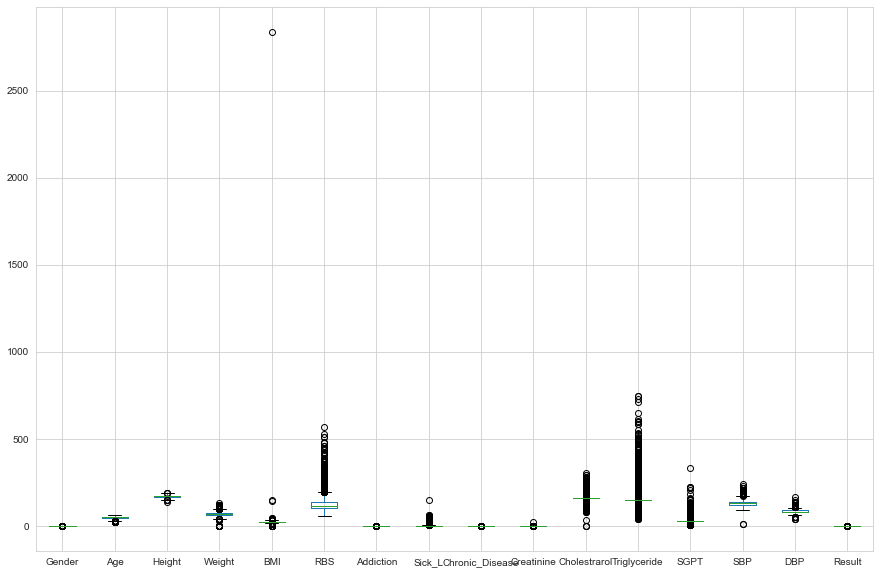

In [486]:
plt.figure(figsize=(15,10))
df.boxplot()

In [487]:
df.Gender.shape

(3957,)

In [488]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [489]:
check = df.drop(['Gender'],axis=1)
for column in check:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

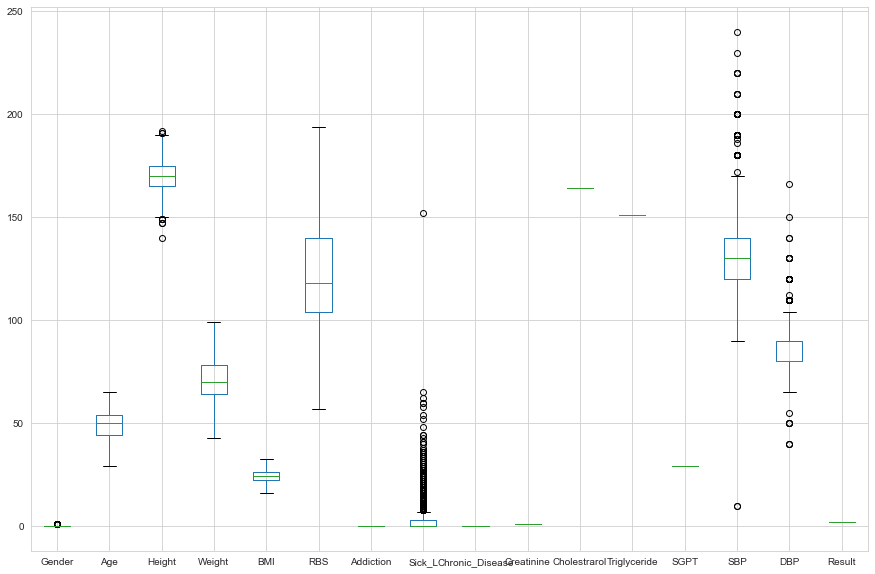

In [490]:
plt.figure(figsize=(15,10))
df.boxplot()

<AxesSubplot:>

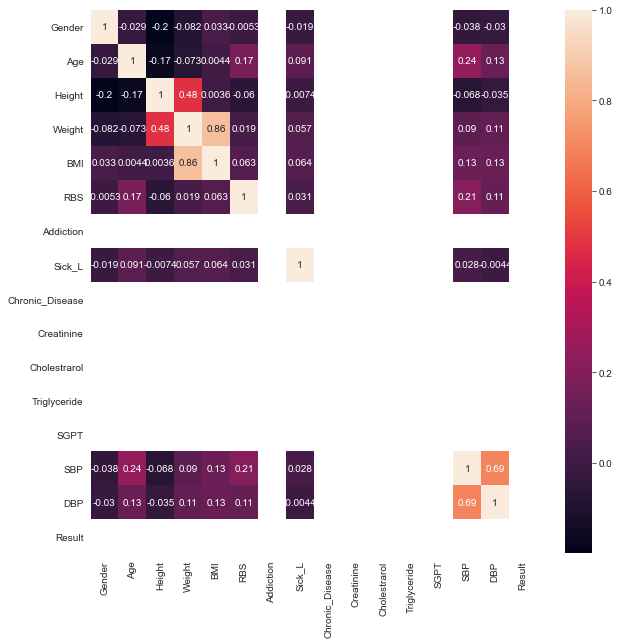

In [491]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)